[[  0.   1.   2. ...  -2.  -3.  -4.]
 [  0.  -1.  -2. ...   8.   7.   8.]
 [  0.   1.   2. ... -12. -13. -12.]
 ...
 [  0.  -1.  -2. ...   4.   3.   2.]
 [  0.   1.   2. ...  52.  51.  50.]
 [  0.   1.   0. ... -40. -39. -38.]]


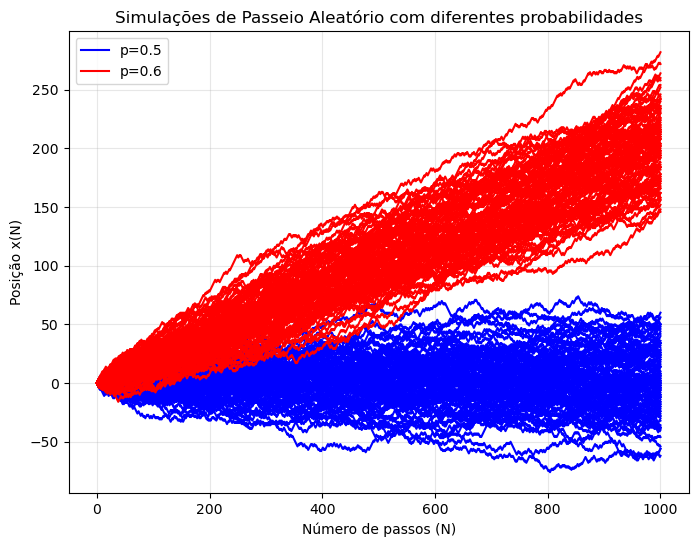

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

class PasseioAleatorio:
    def __init__(self, p, N):
        """
        Parâmetros:
        p (float): Probabilidade de movimento para a direita
        N (int): Número de passos no passeio
        """
        self.p = p
        self.N = N
    
    def função_passeio(self):
        """
        Gera um passeio aleatório usando rng.choice() e np.cumsum()
        
        Retorna:
        array: Posições do passeio aleatório
        """
        rng = np.random.default_rng()
        passos = rng.choice([1, -1], size=self.N, p=[self.p, 1-self.p])
        
        x = np.concatenate(([0], np.cumsum(passos)))
        
        return x



p_valores = [0.5, 0.6]
num_simulacoes = 100
num_passos = 1000


plt.figure(figsize=(8, 6))

cores = ['blue', 'red']

# Arrays para armazenar todas as posições
posicoes_p05 = np.zeros((num_simulacoes, num_passos + 1))
posicoes_p06 = np.zeros((num_simulacoes, num_passos + 1))



for cor, p_valor in enumerate(p_valores):
    
    for i in range(num_simulacoes):
        # Gera o passeio
        passeio = PasseioAleatorio(p_valor, num_passos)
        posicoes = passeio.função_passeio()
        
        # Armazena todas as posições do passeio
        if p_valor == 0.5:
            posicoes_p05[i] = posicoes
        else:  # p_valor == 0.6
            posicoes_p06[i] = posicoes
        
        if i == 0:  # Apenas adiciona a label na primeira simulação de cada p
            plt.plot(range(len(posicoes)), posicoes, color=cores[cor], alpha=1, 
                     label=f'p={p_valor}')
        else:
            plt.plot(range(len(posicoes)), posicoes, color=cores[cor], alpha=1)


print(posicoes_p05) #testando a lista

plt.ylabel('Posição x(N)')
plt.xlabel('Número de passos (N)')
plt.title('Simulações de Passeio Aleatório com diferentes probabilidades')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Salva todas as posições usando np.savez
np.savez('todas_posicoes_passeio.npz', 
         posicoes_p05=posicoes_p05,  
         posicoes_p06=posicoes_p06)  
